In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

In [2]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
host = '88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)
C=DB.cursor()

In [ ]:
# atrinkti 10 populiariausių gamintojų iš autopliuslt, pateikti tokius stulpelius - gamintojas, 
# vidutinė kaina, vidutinė rida, vidutinis amžius, modelių kiekis. Gautus rezultatus surašyti į 
# SQLite duomebazę, pavadinimu "Testas.db", lentelės pavadinimas kokį sugalvosite. Viską turi atlikti 
# python kodas. PANDAS NEGALIMA NAUDOTI, viską atlikite per cursor() objektus.

#Testas.db duomenu baze 


In [3]:
sql="""
SELECT 
    gamintojas, 
    ROUND(AVG(REPLACE(REPLACE(price, ' ', ''), 'km', ''))) AS price, 
    ROUND(AVG(REPLACE(REPLACE(rida, ' ', ''), 'km', ''))) AS rida, 
    ROUND(AVG(SUBSTRING(pagaminimo_data, 1, 4))) AS metai, 
    count(modelis) as modelis
FROM autopliuslt
GROUP BY gamintojas
ORDER BY modelis desc
LIMIT 10;"""
C.execute(sql)
ans = C.fetchall()
gamintojas, price, rida, metai, modelis = list(map(list, zip(*ans)))
#? = np.transpose(ans)

In [10]:
print(ans)

[('BMW', 10652.0, 260654.0, 2009.0, 365), ('Volkswagen', 6191.0, 237651.0, 2008.0, 310), ('Audi', 8448.0, 241376.0, 2007.0, 227), ('Mercedes-Benz', 15080.0, 261259.0, 2009.0, 177), ('Toyota', 8713.0, 201755.0, 2009.0, 154), ('Volvo', 7848.0, 278037.0, 2009.0, 138), ('Opel', 4006.0, 226788.0, 2008.0, 134), ('Ford', 5592.0, 225685.0, 2009.0, 110), ('Peugeot', 6748.0, 205881.0, 2011.0, 78), ('Skoda', 10808.0, 181196.0, 2013.0, 74)]


In [14]:
SDB = sqlite3.connect('Duomenys1.db') # jei neegsiztuoja - bus sukurfta nauja sqlite DB
Cs = SDB.cursor()

sql = '''create table if not exists T100
(
    gamintojas text not null,
    price integer not null,
    rida integer not null,
    metai integer not null,
    modelis text not null
)
'''
Cs.execute(sql)   #sukuriame lentele 

sql_template = '''insert into T100 values (?,?,?,?,?)'''
data = [ans]
Cs.executemany(sql_template, ans)

# Cs.execute(sql_template, ('T100','F1', 10, 1024))

SDB.commit() # commit() būtinas, jei norite įrašyti duoenis į DB

SDB.close()

In [ ]:
# JASON formats 

df = pd.read_json('../DATA/')
df.head(1)

# data ir laika reikia konvertuoti i datetime objekta 



In [ ]:
df['dataLaikas'] = pd.to_datetime(df['data:Laikas'])             #pakeicia ir iraso i ta pati stulpeli 
df.info()              

In [ ]:
# nuskaitykite JSON failą -  2023 metus
# konvertuokite dataLaikas stulpelį į datetime
#  pd.to_datetime(df[stulpelis])
# pridėkite naują stulplelį, kur būtų tik įvykio valanda
# pridėkite naują stulpelį su paros laikais (rytas, vakaras ...)
# Vizualizuokite, kuriuo paros laiku, kurią valandą įvyksta daugiausiai eismo įvykių
# Vyrų ar moterų buvo daugiau, sukėlusių eismo įvykį?
#  koks vidutinis kaltininkų amžius?

# Kokiomis baudų rūšimis buvo nubausti vyrai/moterys (administracinė, baudžiamoji) (teisenosStadijaBusena)

In [22]:
df = pd.read_json('ei_2023_12_31.json')
df.head(10)

,registrokodas,dataLaikas,registravimoData,paskutinioRedagavimoLaikas,iskaitinis,rusis,schema1,schema2,dalyviuSkaicius,zuvusiuSkaicius,...,kelioElementas2,privalomasLeistinasGreitis,leistinasGreitis,neblaivusKaltininkai,apsvaigeKaltininkai,atsisakeTikrintisKaltininkai,ilguma,platuma,eismoDalyviai,eismoTranspPreimone
0,07-23-9588945,2023-01-01 00:27,2023-01-01 01:04,2023-03-31 12:14,0,Kiti eismo įvykiai,Kiti eismo įvykiai,Kiti eismo įvykiai,2,0,...,None,1,40.0,Ne,Ne,Ne,6063990.0,579292.0,"[{'dalyvisId': 48690423, 'kategorija': 'Kiti',...","[{'tpId': 33646065, 'regValstybe': 'Lietuva', ..."
1,07-23-9588946,2023-01-01 00:10,2023-01-01 01:04,2023-01-01 02:50,0,Susidūrimas,Susidūrimai judant ta pačia kryptimi,Atsitrenkimas į galą,2,0,...,None,1,50.0,Taip,Ne,Ne,6178087.0,336529.0,"[{'dalyvisId': 48474937, 'kategorija': 'Automo...","[{'tpId': 33416867, 'regValstybe': 'Lietuva', ..."
2,07-23-9588947,2023-01-01 00:38,2023-01-01 01:39,2023-01-02 14:44,0,Susidūrimas su stovinčia transporto priemone,Kiti susidūrimai,Kiti susidūrimai,2,0,...,None,1,20.0,Ne,Ne,Ne,6061672.0,582508.0,"[{'dalyvisId': 48480520, 'kategorija': 'Automo...","[{'tpId': 33421658, 'regValstybe': 'Lietuva', ..."
3,07-23-9588948,2023-01-01 00:35,2023-01-01 01:58,2023-01-01 02:17,0,Kiti eismo įvykiai,Nuvažiavimai nuo kelio,Nuvažiavimai nuo kelio į dešinę tiesiame ruože,1,0,...,None,1,110.0,Ne,Ne,Ne,6149775.0,540444.0,"[{'dalyvisId': 48474443, 'kategorija': 'Automo...","[{'tpId': 33416857, 'regValstybe': 'Lietuva', ..."
4,07-23-9588949,2022-12-31 23:53,2023-01-01 02:05,2023-02-13 10:50,0,Susidūrimas su stovinčia transporto priemone,Kiti eismo įvykiai,Susidūrimas su stovinčia TP,2,0,...,None,1,20.0,Ne,Ne,Ne,6069699.0,581077.0,"[{'dalyvisId': 48579303, 'kategorija': 'Automo...","[{'tpId': 33533521, 'regValstybe': 'Lietuva', ..."
5,07-23-9588950,2023-01-01 01:30,2023-01-01 02:19,2023-01-01 02:21,0,Užvažiavimas ant gyvūno,Kiti eismo įvykiai,Kiti eismo įvykiai,1,0,...,None,1,90.0,Ne,Ne,Ne,6168876.0,327579.0,"[{'dalyvisId': 48474447, 'kategorija': 'Automo...","[{'tpId': 33416859, 'regValstybe': 'Lietuva', ..."
6,07-23-9588951,2023-01-01 00:59,2023-01-01 03:24,2023-01-02 12:40,0,Susidūrimas,Priešpriešiniai susidūrimai,Priešpriešinis susidūrimas,1,0,...,None,1,20.0,Taip,Ne,Ne,6156579.0,567341.0,"[{'dalyvisId': 48480327, 'kategorija': 'Automo...","[{'tpId': 33421561, 'regValstybe': 'Lietuva', ..."
7,07-23-9588952,2023-01-01 00:58,2023-01-01 04:31,2023-12-15 13:58,0,Užvažiavimas ant kliūties,Kiti susidūrimai,Kiti susidūrimai,1,0,...,None,1,50.0,Taip,Ne,Ne,6041453.0,506663.0,"[{'dalyvisId': 48484584, 'kategorija': 'Automo...","[{'tpId': 33424930, 'regValstybe': None, 'kate..."
8,07-23-9588953,2022-12-31 23:57,2023-01-01 04:44,2023-01-01 04:44,0,Kiti eismo įvykiai,Nuvažiavimai nuo kelio,Visi nuvažiavimai nuo kelio sankryžoje,1,0,...,None,1,70.0,Taip,Ne,Ne,6244356.0,387807.0,"[{'dalyvisId': 48475427, 'kategorija': 'Automo...","[{'tpId': 33417363, 'regValstybe': 'Lietuva', ..."
9,07-23-9588954,2023-01-01 03:58,2023-01-01 04:48,2023-01-12 10:34,0,Kiti eismo įvykiai,Nuvažiavimai nuo kelio,Nuvažiavimai nuo kelio į dešinę tiesiame ruože,1,0,...,None,1,70.0,Taip,Ne,Ne,6179312.0,523550.0,"[{'dalyvisId': 48504319, 'kategorija': 'Automo...","[{'tpId': 33446028, 'regValstybe': 'Lietuva', ..."


In [43]:
df = pd.read_json('ei_2023_12_31.json')


df['dataLaikas'] = pd.to_datetime(df['dataLaikas'])             #pakeicia ir iraso i ta pati stulpeli 
df['valanda'] = df['dataLaikas'].dt.hour


def paros_laikas(valanda):
    if 6 <= valanda <= 9:
        return 'rytas'
    elif 10 <= valanda <= 17:
        return 'diena'
    elif 18 <= valanda <= 21:
        return 'vakaras'
    else:
        return 'naktis'

df['paros_laikas'] = df['valanda'].apply(paros_laikas)

df.head(5)




,registrokodas,dataLaikas,registravimoData,paskutinioRedagavimoLaikas,iskaitinis,rusis,schema1,schema2,dalyviuSkaicius,zuvusiuSkaicius,...,leistinasGreitis,neblaivusKaltininkai,apsvaigeKaltininkai,atsisakeTikrintisKaltininkai,ilguma,platuma,eismoDalyviai,eismoTranspPreimone,valanda,paros_laikas
0,07-23-9588945,2023-01-01 00:27:00,2023-01-01 01:04,2023-03-31 12:14,0,Kiti eismo įvykiai,Kiti eismo įvykiai,Kiti eismo įvykiai,2,0,...,40.0,Ne,Ne,Ne,6063990.0,579292.0,"[{'dalyvisId': 48690423, 'kategorija': 'Kiti',...","[{'tpId': 33646065, 'regValstybe': 'Lietuva', ...",0,naktis
1,07-23-9588946,2023-01-01 00:10:00,2023-01-01 01:04,2023-01-01 02:50,0,Susidūrimas,Susidūrimai judant ta pačia kryptimi,Atsitrenkimas į galą,2,0,...,50.0,Taip,Ne,Ne,6178087.0,336529.0,"[{'dalyvisId': 48474937, 'kategorija': 'Automo...","[{'tpId': 33416867, 'regValstybe': 'Lietuva', ...",0,naktis
2,07-23-9588947,2023-01-01 00:38:00,2023-01-01 01:39,2023-01-02 14:44,0,Susidūrimas su stovinčia transporto priemone,Kiti susidūrimai,Kiti susidūrimai,2,0,...,20.0,Ne,Ne,Ne,6061672.0,582508.0,"[{'dalyvisId': 48480520, 'kategorija': 'Automo...","[{'tpId': 33421658, 'regValstybe': 'Lietuva', ...",0,naktis
3,07-23-9588948,2023-01-01 00:35:00,2023-01-01 01:58,2023-01-01 02:17,0,Kiti eismo įvykiai,Nuvažiavimai nuo kelio,Nuvažiavimai nuo kelio į dešinę tiesiame ruože,1,0,...,110.0,Ne,Ne,Ne,6149775.0,540444.0,"[{'dalyvisId': 48474443, 'kategorija': 'Automo...","[{'tpId': 33416857, 'regValstybe': 'Lietuva', ...",0,naktis
4,07-23-9588949,2022-12-31 23:53:00,2023-01-01 02:05,2023-02-13 10:50,0,Susidūrimas su stovinčia transporto priemone,Kiti eismo įvykiai,Susidūrimas su stovinčia TP,2,0,...,20.0,Ne,Ne,Ne,6069699.0,581077.0,"[{'dalyvisId': 48579303, 'kategorija': 'Automo...","[{'tpId': 33533521, 'regValstybe': 'Lietuva', ...",23,naktis


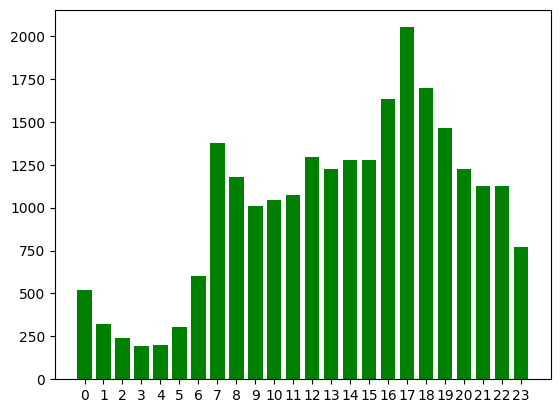

In [62]:
vakaras_value_counts = df['valanda'].value_counts().sort_index()

x = vakaras_value_counts.index.tolist()  
y = vakaras_value_counts.values.tolist()   

# Grafiko sukūrimas
fig, ax = plt.subplots()
ax.bar(x, y, color='green', width=0.75)  # Stulpelio brėžimas su spalva, legenda ir plotis

# Nustatomos X ašies žymės ir pakeičiamos žymių pavadinimai
ax.set_xticks(x)
plt.show()

['Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Moteris', 'Moteris', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Moteris', 'Moteris', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Moteris', 'Vyras', 'Vyras', 'Moteris', 'Moteris', 'Moteris', 'Moteris', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Moteris', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Moteris', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Moteris', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Moteris', 'Moteris', 'Vyras', 'Moteris', 'Vyras', 'Moteris', 'Vyras', 'Vyras', 'Moteris', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Moteris', 'Vyras', 'Vyras', 'Moteris', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Moteris', 'Vyras', 'Moteris', 'Vyras', 'Moteris', 'Moteris', 'Moteris', 'Vyras', 'Moteris', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Moteris', 'V

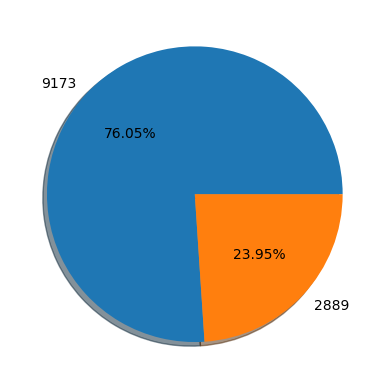

In [102]:
lytis = []

def funkc(x):
    for dalyvis in x:
        if dalyvis['kaltininkas'] == 'Taip':
            a = dalyvis['lytis']
            if a == 'Vyras' or a == 'Moteris':  
                lytis.append(a)  
            else:
                pass  

df['eismoDalyviai'].apply(funkc)

print(lytis)
# moterys = 

# viso = len(lytis)
vyrai = lytis.count('Vyras')
moterys = lytis.count('Moteris')

statistika = [vyrai, moterys]

# print (viso, vyrai, moterys)


# x = [1, 2, 3, 5, 8]  # Sektorių vertės
# explode = [0, 0, 0, 0, 0.25]  # Paryškintas penktas sektorius

# Grafiko sukūrimas
fig, ax = plt.subplots()
ax.pie(statistika, labels=statistika, autopct='%1.2f%%', shadow=True)  # Skritulinės diagramos nustatymai

# Rodoma diagrama
plt.show()



In [110]:
amzius = []

def funkc1(x):
    for dalyvis in x:
        if dalyvis['kaltininkas'] == 'Taip':
            b = dalyvis['amzius']
            if type(b) == int:
                amzius.append(b)  
            else:
                pass  

df['eismoDalyviai'].apply(funkc1)
print(amzius)
vidurkis = sum(amzius) / len(amzius)
print(vidurkis)

[50, 27, 45, 48, 34, 48, 46, 18, 26, 24, 19, 34, 39, 26, 37, 59, 40, 19, 36, 39, 63, 52, 28, 35, 65, 48, 63, 36, 20, 80, 61, 37, 65, 18, 75, 80, 44, 65, 24, 18, 27, 36, 52, 76, 34, 45, 22, 30, 36, 60, 29, 40, 58, 40, 49, 37, 33, 65, 36, 66, 51, 51, 64, 41, 36, 63, 28, 70, 47, 42, 36, 37, 52, 39, 33, 53, 42, 43, 43, 39, 27, 27, 70, 36, 22, 19, 27, 31, 59, 27, 35, 37, 47, 24, 29, 55, 48, 27, 44, 73, 49, 51, 57, 25, 69, 64, 70, 51, 21, 29, 23, 49, 38, 37, 62, 35, 46, 46, 21, 22, 48, 30, 35, 39, 69, 26, 54, 40, 40, 39, 19, 33, 70, 53, 35, 68, 37, 70, 27, 27, 36, 62, 42, 58, 50, 57, 62, 32, 41, 34, 40, 20, 33, 26, 33, 36, 65, 18, 54, 40, 63, 43, 30, 45, 55, 23, 52, 27, 45, 25, 32, 59, 43, 57, 26, 60, 50, 63, 21, 57, 18, 49, 35, 23, 35, 31, 28, 27, 24, 39, 53, 71, 18, 61, 22, 79, 46, 54, 51, 44, 34, 45, 61, 18, 55, 50, 33, 19, 47, 24, 29, 37, 52, 53, 47, 58, 51, 54, 27, 32, 38, 39, 54, 51, 47, 28, 31, 59, 82, 56, 26, 40, 26, 22, 61, 48, 22, 80, 25, 48, 27, 51, 35, 42, 55, 31, 29, 44, 25, 22,

In [93]:
# PVZ kaip pasiekti dali informacijos 

def fn (x):
    print(x[0]['lytis'])                #funkcija turi isrinkti tik tuo atveju jei kaltininkas yra lytis 
    
df['eismoDalyviai'].apply(fn)

def 
if kaltinis taip 
lytis 
print()



SyntaxError: invalid syntax (1063601027.py, line 8)

In [86]:
print(df['eismoDalyviai'])

0        [{'dalyvisId': 48690423, 'kategorija': 'Kiti',...
1        [{'dalyvisId': 48474937, 'kategorija': 'Automo...
2        [{'dalyvisId': 48480520, 'kategorija': 'Automo...
3        [{'dalyvisId': 48474443, 'kategorija': 'Automo...
4        [{'dalyvisId': 48579303, 'kategorija': 'Automo...
                               ...                        
24235    [{'dalyvisId': 49086534, 'kategorija': 'Automo...
24236    [{'dalyvisId': 49086564, 'kategorija': 'Automo...
24237    [{'dalyvisId': 49094163, 'kategorija': 'Automo...
24238    [{'dalyvisId': 49159858, 'kategorija': 'Automo...
24239    [{'dalyvisId': 49087861, 'kategorija': 'Keleiv...
Name: eismoDalyviai, Length: 24240, dtype: object


In [104]:
df['eismoDalyviai'][0][0]

{'dalyvisId': 48690423,
 'kategorija': 'Kiti',
 'dalyvioTipas': 'Kitas asmuo',
 'pasisalino': 'Ne',
 'asmuoNezinomas': 'Ne',
 'lytis': 'Vyras',
 'pilietybe': None,
 'amzius': 50,
 'neigalumas': 'Ne',
 'saugosDirzas': None,
 'vaikoKedesNaudojimas': None,
 'saugosSalmoNaudojimas': None,
 'oroPagalves': None,
 'bukle': 'Nenukentėjo',
 'detaliBukle': None,
 'suzalojimoMastas': None,
 'vairuotojoKvalifikacija': None,
 'vairavimoStazas': None,
 'busena': 'Blaivus',
 'detaliBusena': None,
 'papBusena': None,
 'detaliPapBusena': None,
 'kaltininkas': 'Taip',
 'girtumasPromilemis': None,
 'dalyvioBusena': 'KALTININKAS',
 'teisenosStadijaBusena': 'ADMINISTRACINIS',
 'dalyvioKetPazeidimai': ['Kiti Kelių eismo taisyklių pažeidimai'],
 'tpId': None}

In [114]:
a = df['eismoDalyviai'][0][0]['teisenosStadijaBusena']
b = df['eismoDalyviai'][0][0]['kaltininkas']
c = df['eismoDalyviai'][0][0]['lytis']

print(a,b,c)

ADMINISTRACINIS Taip Vyras


In [120]:
motadmin = []
vyradmin = []

motiki = []
vyriki = []

def funkc1(x):
    for dalyvis in x:
        if dalyvis['kaltininkas'] == 'Taip' and dalyvis['lytis'] == 'Vyras':
            d = dalyvis['teisenosStadijaBusena']
            vyradmin.append(d)  
        else:
            if dalyvis['kaltininkas'] == 'Taip' and dalyvis['lytis'] == 'Moteris':
                e = dalyvis['teisenosStadijaBusena']
                motadmin.append(e)
                  


df['eismoDalyviai'].apply(funkc1)
print(motadmin)
print(vyradmin)

unikalus = set(motadmin)

# Kiekvienos unikalios reikšmės pasikartojimo skaičiavimas
for reiksme in unikalus:
    pasikartojimu_skaicius = motadmin.count(reiksme)
    print(pasikartojimu_skaicius)

['ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'IKITEISMINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'IKITEISMINIS', 'ADMINISTRACINIS', 'IKITEISMINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'IKITEISMINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'IKITEISMINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'IKITEISMINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTRACINIS', 'ADMINISTR